In [33]:
import pandas as pd
import numpy as np
import normalization_file
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


data = pd.read_csv("Ecommerce Customers.csv")
#print(data.head(15))

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]
data_cat = data[["Email","Address"]]

Normalizing data

In [34]:
data_num_norm = normalization_file.data_num_norm_normfile
print(data_num_norm.head(5))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             0.751425     0.626620         0.929816              0.573101   
1             0.362306     0.393016         0.550801              0.359869   
2             0.524953     0.426378         0.524803              0.576396   
3             0.722409     0.787050         0.460890              0.428434   
4             0.574861     0.647702         0.594748              0.627768   

   Yearly Amount Spent  
0             0.651040  
1             0.266355  
2             0.453725  
3             0.639055  
4             0.673552  


Turning dataframe into np.ndarray

In [35]:
# data_num_norm is a dataframe -> we need np.ndarray
# .values transforms df into np.array (if neccessary specify needed columns with .iloc[])
x = data_num_norm.iloc[:,[2,4]].values
print(x.shape)

(500, 2)


Elbow 

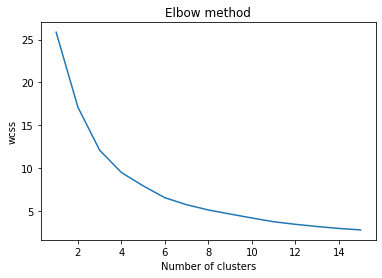

In [36]:
# Elbow method
# wcss => within cluster sum of squares
# .inertia_ => Sum of squared distances of samples to their closest cluster center
wcss = []
for i in range(1,16):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,16), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()


KMeans

In [37]:
# setting up KMeans algorithm 
# init = method for initialization ("k-means++" -> smart choosing of centroids(default), could also be "random",... )
km = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

KMeans visualisation

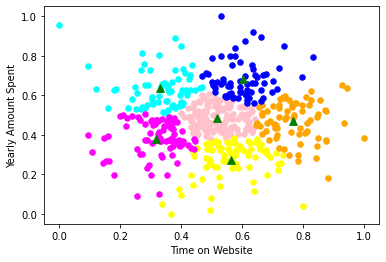

In [38]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 30, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 30, c = "yellow")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 30, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 30, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 30, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 30, c = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 60, c = 'green' , label = 'centeroid', marker="^")
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")
plt.show()

KMeans compact Avg. Session Length & Length of Membership

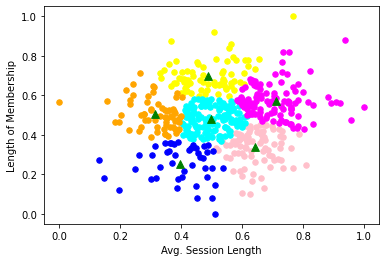

In [39]:
x = data_num_norm.iloc[:,[0,3]].values

km = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 30, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 30, c = "yellow")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 30, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 30, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 30, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 30, c = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 60, c = 'green' , label = 'centeroid', marker="^")

plt.xlabel("Avg. Session Length")
plt.ylabel("Length of Membership")
plt.show()

KMeans compact Yearly Amount Spent & Length of Membership

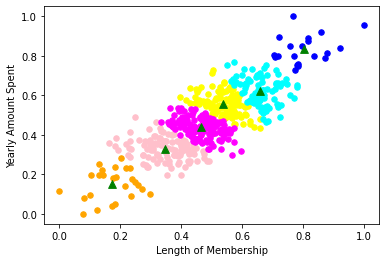

In [40]:
x = data_num_norm.iloc[:,[3,4]].values

km = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 30, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 30, c = "yellow")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 30, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 30, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 30, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 30, c = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 60, c = 'green' , label = 'centeroid', marker="^")

plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

KMeans compact Yearly Amount Spent & Length of Membership

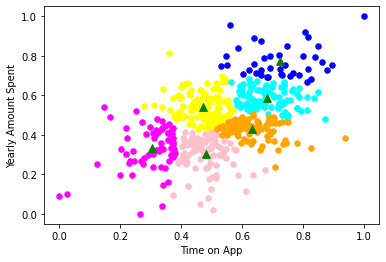

In [41]:
x = data_num_norm.iloc[:,[1,4]].values

km = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 30, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 30, c = "yellow")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 30, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 30, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 30, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 30, c = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 60, c = 'green' , label = 'centeroid', marker="^")

plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.show()